# Scraping Code

Some code to get some data from various websites.

Could later be moved to a function that the bot can use, as part of an ETL pipeline process.

https://runescape.wiki/w/Application_programming_interface#Grand_Exchange_Database_API

Item IDs can be found manually at: https://www.itemdb.biz/index.php

In [1]:
import requests
import pandas as pd

from pathlib import Path

# Couldn't find a great way to query item IDs from name, so using manually found IDs.
def get_item_rs3(item_id, item_name, base_savepath):
    
    proc_item_name = item_name.replace(" ", "_")
     
    url = "https://services.runescape.com/m=itemdb_rs/obj_sprite.gif?id="+str(item_id)

    filename = base_savepath + proc_item_name + '.png'
    # Don't scrape file unnecessarily
    if Path(filename).exists():
        print(filename,"already exists, skipped.")
        return proc_item_name, filename
    
    img_data = requests.get(url).content
    with open(filename, 'wb') as handler:
        handler.write(img_data)
    
    return proc_item_name, filename

def get_items_rs3(item_ids: list, item_names: list, drop_rate: list, boss=None) -> None:
    
    assert len(item_ids) == len(item_names) and len(drop_rate) == len(item_ids), "The lists provided need to be of equal length"
    
    to_get = zip(item_ids, item_names, drop_rate)
    
    extra_filepath=""
    if boss is not None:
        extra_filepath = boss + "/"
    base_filepath = "./data/items/" + extra_filepath
    # Make the directories if not present
    Path(base_filepath).mkdir(parents=True, exist_ok=True)
    
    data_collected = []
    for ID, name, dr in to_get:
        proc_name, file = get_item_rs3(ID, name, base_filepath)
        print(proc_name,"image saved to",file)
        
        data_collected.append([ID, proc_name, file, dr])
        
    df = pd.DataFrame(data_collected, columns=["id","name","filepath","drop_rate"])
    display(df)
    csv_savepath = base_filepath + "lookup_data.csv"
    df.to_csv(csv_savepath, index=False)
    print("Summary CSV saved to",csv_savepath)
    return df

# Scraping

Could be added to a cleanup/recovery ETL process

### Kerapac

In [2]:
# Kerapac items
get_items_rs3([51096, 51812, 51770,
               51776, 51779, 51782,
               51862],
              ["Greater Concentrated blast ability codex","Scripture of Jas","Kerapac's wrist wraps",
               "Fractured Armadyl symbol", "Fractured stabilisation gem", "Staff of Armadyl's fractured shaft",
               "Kerapac's mask piece"],
              [449/259200, 449/259200, 449/259200,
               1/450, 1/450, 1/450,
               1/1500]
              ,boss="kerapac")
print("Finished.")

Greater_Concentrated_blast_ability_codex image saved to ./data/items/kerapac/Greater_Concentrated_blast_ability_codex.png
Scripture_of_Jas image saved to ./data/items/kerapac/Scripture_of_Jas.png
Kerapac's_wrist_wraps image saved to ./data/items/kerapac/Kerapac's_wrist_wraps.png
Fractured_Armadyl_symbol image saved to ./data/items/kerapac/Fractured_Armadyl_symbol.png
Fractured_stabilisation_gem image saved to ./data/items/kerapac/Fractured_stabilisation_gem.png
Staff_of_Armadyl's_fractured_shaft image saved to ./data/items/kerapac/Staff_of_Armadyl's_fractured_shaft.png
Kerapac's_mask_piece image saved to ./data/items/kerapac/Kerapac's_mask_piece.png


,id,name,filepath,drop_rate
0,51096,Greater_Concentrated_blast_ability_codex,./data/items/kerapac/Greater_Concentrated_blas...,0.001732
1,51812,Scripture_of_Jas,./data/items/kerapac/Scripture_of_Jas.png,0.001732
2,51770,Kerapac's_wrist_wraps,./data/items/kerapac/Kerapac's_wrist_wraps.png,0.001732
3,51776,Fractured_Armadyl_symbol,./data/items/kerapac/Fractured_Armadyl_symbol.png,0.002222
4,51779,Fractured_stabilisation_gem,./data/items/kerapac/Fractured_stabilisation_g...,0.002222
5,51782,Staff_of_Armadyl's_fractured_shaft,./data/items/kerapac/Staff_of_Armadyl's_fractu...,0.002222
6,51862,Kerapac's_mask_piece,./data/items/kerapac/Kerapac's_mask_piece.png,0.000667


Summary CSV saved to ./data/items/kerapac/lookup_data.csv
Finished.


In [3]:
# Raksha items
get_items_rs3([51094, 51096, 51086,
               51098, 48083, 48087,
               51084,
               51102],
              ["Greater Ricochet ability codex","Greater Chain ability codex","Shadow spike",
               "Divert ability codex", "Laceration boots", "Blast diffusion boots",
               "Fleeting boots",
               "Broken shackle"],
              [1/500, 1/500, 1/500,
               1/500, 1/200, 1/200,
               1/200,
               1/1000]
              ,boss="raksha")
print("Finished.")

Greater_Ricochet_ability_codex image saved to ./data/items/raksha/Greater_Ricochet_ability_codex.png
Greater_Chain_ability_codex image saved to ./data/items/raksha/Greater_Chain_ability_codex.png
Shadow_spike image saved to ./data/items/raksha/Shadow_spike.png
Divert_ability_codex image saved to ./data/items/raksha/Divert_ability_codex.png
Laceration_boots image saved to ./data/items/raksha/Laceration_boots.png
Blast_diffusion_boots image saved to ./data/items/raksha/Blast_diffusion_boots.png
Fleeting_boots image saved to ./data/items/raksha/Fleeting_boots.png
Broken_shackle image saved to ./data/items/raksha/Broken_shackle.png


,id,name,filepath,drop_rate
0,51094,Greater_Ricochet_ability_codex,./data/items/raksha/Greater_Ricochet_ability_c...,0.002
1,51096,Greater_Chain_ability_codex,./data/items/raksha/Greater_Chain_ability_code...,0.002
2,51086,Shadow_spike,./data/items/raksha/Shadow_spike.png,0.002
3,51098,Divert_ability_codex,./data/items/raksha/Divert_ability_codex.png,0.002
4,48083,Laceration_boots,./data/items/raksha/Laceration_boots.png,0.005
5,48087,Blast_diffusion_boots,./data/items/raksha/Blast_diffusion_boots.png,0.005
6,51084,Fleeting_boots,./data/items/raksha/Fleeting_boots.png,0.005
7,51102,Broken_shackle,./data/items/raksha/Broken_shackle.png,0.001


Summary CSV saved to ./data/items/raksha/lookup_data.csv
Finished.


In [66]:
import random

# @Returns
# A list of DF rows containing information about the item dropped. Also contains
# None objects to represent no item dropping.
def droppedItem(boss, kill_count=1, base_filepath="./data/items/"):

    if kill_count > 100:
        kill_count = 100
    if kill_count < 1:
        kill_count = 1
    
    csv_filepath=base_filepath + boss + "/lookup_data.csv"
    data = pd.read_csv(csv_filepath)
    
    # display(data)
    
    row_num = data.shape[0]
    row_idxs = range(row_num+1)
    
    drop_rates = list(data["drop_rate"])
    # Assumes sum of drop_rates <= 1
    new_drs = drop_rates + [1-sum(drop_rates)]
    
    results = []
    chosen_indexs = random.choices(row_idxs, weights=new_drs, k=kill_count)
    for i in chosen_indexs:
        if i != row_num:
            row_chosen = data.iloc[i]
        else:
            row_chosen = None
        results.append(row_chosen)
    
    return results

In [70]:
test_results = droppedItem("kerapac", kill_count=100)
print(test_results)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, id                                                       51779
name                               Fractured_stabilisation_gem
filepath     ./data/items/kerapac/Fractured_stabilisation_g...
drop_rate                                           0.00222222
Name: 4, dtype: object, None, None, None, None, None, id                                               51812
name                                  Scripture_of_Jas
filepath     ./data/items/kerapac/Scripture_of_Jas.png
drop_rate                                   0.00173225
Name: 1, dtype: object, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, id                                                       51782
name          

In [72]:
def process_drops(drops):

    for elem in drops:
        if elem is None:
            continue
        print(elem["name"])

process_drops(test_results)

Fractured_stabilisation_gem
Scripture_of_Jas
Staff_of_Armadyl's_fractured_shaft


In [13]:
import os

def get_supported_bosses():
    
    base_filepath = "./data/items/"
    
    toReturn = []
    for p in os.listdir(base_filepath):
        to_test = base_filepath + p
        if os.path.isdir(to_test) and not p.startswith('.'):
            toReturn.append(p)
    return toReturn

get_supported_bosses()

['kerapac']

In [2]:
charizard = pb.pokemon('charizard')
charmander = pb.pokemon('charmander')

In [2]:
# TODO - Move to seperate file for discord bot to import
import random

# Make annotation
def gen_pman_wrapper(pman_like):
    
    pman = pb.pokemon(pman_like)
    if not hasattr(pman, "types"):
        return None
    
    return pman

def generate_guess():
    
    pman = gen_pman_wrapper(random.choice(range(1,493+1)))
    print("The Pokemon to guess is",pman.name)
    
    return pman

def debug_guess(pman_name):
    
    pman = gen_pman_wrapper(pman_name)
    print("The Pokemon to guess is",pman.name)
    
    return pman

# Hard coded ranges, 
def id_to_gen(pman_id):
    
    if pman_id <= 151:
        return 1
    elif pman_id <= 251:
        return 2
    elif pman_id <= 386:
        return 3
    elif pman_id <= 493:
        return 4
    elif pman_id <= 649:
        return 5
    elif pman_id <= 721:
        return 6
    elif pman_id <= 809:
        return 7
    elif pman_id <= 905:
        return 8
    
def compare(t, g):
    
    if g > t:
        return "lower"
    elif g < t:
        return "higher"
    return "equal"
    
# @Returns:
# - If guessed_pman_name could not be converted to a pokemon object, None.
# - If guess was correct, True
# - If guess was incorrect, a dictionary
def guess_analysis(target_pman, guessed_pman_name):
    
    # TODO
    guessed_pman = gen_pman_wrapper(guessed_pman_name) # Catch error making pman here?
    if guessed_pman is None:
        print("POKEMON NOT FOUND - CHUMBUS TODO")
    
    # TODO
    if guessed_pman.name == target_pman.name:
        return True
    
    target_types = list(map(lambda t: t.type, target_pman.types))
    guessed_types = list(map(lambda t: t.type, guessed_pman.types))
    
    if len(target_types) < 2:
        target_types.append(pb.type_("none"))
    if len(guessed_types) < 2:
        guessed_types.append(pb.type_("none"))
    
    type_result = ["", ""]
    
    for i, t_type_obj in enumerate(target_types):
        for j, g_type_obj in enumerate(guessed_types):
            
            t_type = t_type_obj.name
            g_type = g_type_obj.name
            
            if i == j and t_type == g_type:
                print("Type Match!",t_type,g_type)
                type_result[j] = "green"
            elif i != j and t_type == g_type:
                print("Type in wrong place!",t_type,g_type)
                type_result[j] = "yellow"
            elif type_result[j] != "green" and type_result[j] != "yellow": # Don't override yellows
                print("Non matching types?",t_type,g_type)
                type_result[j] = "red"
    
    target_gen, target_height, target_weight = id_to_gen(target_pman.id), target_pman.height, target_pman.weight
    guessed_gen, guessed_height, guessed_weight = id_to_gen(guessed_pman.id), guessed_pman.height, guessed_pman.weight
    
    results = {}
    results["gen"] = compare(target_gen, guessed_gen)
    results["type1"] = type_result[0]
    results["type2"] = type_result[1]
    results["height"] = compare(target_height, guessed_height)
    results["weight"] = compare(target_weight, guessed_weight)
    
    return results
    

In [3]:
# test_pman = generate_guess()
test_pman = debug_guess("sableye")

The Pokemon to guess is sableye


In [4]:
guess_analysis(test_pman, "spiritomb")

Non matching types? dark ghost
Type in wrong place! dark dark
Type in wrong place! ghost ghost


{'gen': 'lower',
 'type1': 'yellow',
 'type2': 'yellow',
 'height': 'lower',
 'weight': 'lower'}

In [6]:
guess_analysis(test_pman, "sableye")

True

In [7]:
guess_analysis(test_pman, "houndoom")

Type Match! dark dark
Non matching types? dark fire
Non matching types? ghost fire


{'gen': 'higher',
 'type1': 'green',
 'type2': 'red',
 'height': 'lower',
 'weight': 'lower'}

In [8]:
guess_analysis(test_pman, "liepard")

Type Match! dark dark
Non matching types? dark none
Non matching types? ghost none


{'gen': 'lower',
 'type1': 'green',
 'type2': 'red',
 'height': 'lower',
 'weight': 'lower'}

In [9]:
guess_analysis(test_pman, "froslass")

Non matching types? dark ice
Non matching types? dark ghost
Non matching types? ghost ice
Type Match! ghost ghost


{'gen': 'lower',
 'type1': 'red',
 'type2': 'green',
 'height': 'lower',
 'weight': 'lower'}

## Squirdle Image Generation

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def get_squirdle_image(response, squirdle_base_filepath):

    im_path = squirdle_base_filepath + response + ".png"
    im = cv2.imread(im_path, cv2.IMREAD_COLOR)

    return im

def add_text(im, text, position):

    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = position
    fontScale              = 0.5
    fontColor              = (255,255,255)
    thickness              = 1
    lineType               = 2
    
    im = cv2.putText(im,text,
                              bottomLeftCornerOfText, 
                              font, 
                              fontScale,
                              fontColor,
                              thickness,
                              lineType)
    
    return im
    
def generate_squirdle_image(results):
    
    # Needed instead of just results due to results being different data types
    if results == True:
        results = {'gen': 'green', 'type1': 'green', 'type2': 'green', 'height': 'green', 'weight': 'green'}

    # TODO - Make self in squirdle when it becomes a class
    squirdle_base_filepath = "./data/squirdle/"
    
    collected_ims = []
    for k, r in results.items():
        
        im = get_squirdle_image(r, squirdle_base_filepath)
        blank_im = np.zeros((im.shape[0], im.shape[1]//3, 3), dtype=im.dtype)
        
        collected_ims.append(blank_im)
        collected_ims.append(im)
    
    collected_ims.append(blank_im)
    
    # Adding padding between images
    combined_im = np.concatenate(tuple(collected_ims),axis=1)
    # Padding top and bottom of image
    blank_im = np.zeros((combined_im.shape[0]//2, combined_im.shape[1], 3), dtype=combined_im.dtype)
    combined_im = np.concatenate((blank_im,combined_im,blank_im),axis=0)
    
    # Convert to RGB for imshow() to display
    # combined_im = cv2.cvtColor(combined_im, cv2.COLOR_BGR2RGB)
    
    combined_im_path = squirdle_base_filepath + "results.png"
    
    for k, pos in zip(results.keys(),[(38,20),(116,20),(200,20),(288,20),(372,20)]):
        if "type" in k:
            k = k[:4] + " " + k[4:]
        combined_im = add_text(combined_im, k.capitalize(), pos)
        
    cv2.imwrite(squirdle_base_filepath + "results.png", combined_im)
    
    plt.imshow(combined_im)
    plt.show()
    
    return combined_im_path


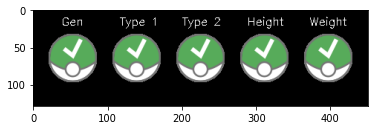

'./data/squirdle/results.png'

In [8]:
test_results = {'gen': 'lower', 'type1': 'red', 'type2': 'red', 'height': 'lower', 'weight': 'green'}
generate_squirdle_image(True)